In [1]:
from pymongo import MongoClient
import pandas as pd  
import numpy as np 

client = MongoClient('localhost', 27017)
db = client['']

tweets = pd.DataFrame(list(db[''].find()))

In [2]:
data = pd.DataFrame(columns=['Tweets'])
data['Tweets'] = tweets['text']
data['Id'] = tweets['_id']
data['len']  = np.array([len(tweet) for tweet in data['Tweets']])
user = list()
for i in range(0,len(tweets)):
    user.append(tweets['user'][i]['name'])
data['user'] = np.array(user)

In [3]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from nltk.corpus import stopwords
from utils import tokenize_and_stem
 
    
documents = data['Tweets']

myStopWords=set(stopwords.words('italian')
                +stopwords.words('english')+
               list(['abbiat', 'abov', 'anch', 'avess', 'avest', 'avet', 'avev', 'avrebb', 'avrest', 'avret', 
                     'avut', 'becaus', 'befor', 'could', 'doe', 'dure', 'ebb', 'erav', 'facciat', 'facess', 
                     'facest', 'facev', 'farebb', 'farest', 'faret', 'foss', 'fost', 'might', 'must', 'need', 
                     'nostr', 'onc', 'onli', 'ourselv', 'qual', 'quant', 'quell', 'quest', 'sarebb', 'sarest', 
                     'saret', 'siat', 'siet', 'starebb', 'starest', 'staret', 'stavat', 'stess', 'stest', 'stett', 
                     'stiat', 'themselv', 'thi', 'veri', 'vostr', 'would', 'yourselv','becau','http','https']))   
    

"""
The most effortless way is by filtering out infrequent words. 
You can achieve this by setting input arguments as follows [1]:

min_df: To ignore terms that have a document frequency lower than the min_df. 
If float, the parameter represents a proportion of documents, integer absolute counts.

max_features: To consider only the top max_features ordered by term frequency across the corpus. 

This is useful if you have strict limit on the size of TF-IDF transformed features.
When dealing with a relatively large corpus, using min_df of 5, 10, or 50 reduces the size of the vocabulary
significantly while maintaining (or often improving) the accuracy.
"""    
    
    
vectorizer = TfidfVectorizer(use_idf=True,
                             ngram_range=(1,5),
                             min_df=100, max_features=300, tokenizer=tokenize_and_stem, stop_words=myStopWords)

X = vectorizer.fit_transform(documents)

In [4]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster :", i),
    lista = [terms[ind] for ind in order_centroids[i, :5]]
    print(lista)

Top terms per cluster:
Cluster : 0
['luccibs', 'quando', 'video', 'nuovo', 'live']
Cluster : 1
['asroma', 'roma', 'oggi', 'grande', 'solo']
Cluster : 2
['alessiafichera', 'foto', 'vedere', 'ciao', 'fare']
Cluster : 3
['grazie', 'cuore', 'auguri', 'ragazzi', 'grande']
Cluster : 4
['sempre', 'grazie', 'grande', 'forza', 'roma']
Cluster : 5
['quando', 'lucaroncella', 'ludotommasini', 'cosa', 'solo']
Cluster : 6
['domenica', 'buona', 'sabato', 'roma', 'volleyatlantide']
Cluster : 7
['repubblica', 'oggi', 'presidente', 'grande', 'prima']
Cluster : 8
['nuova', 'tvdellosport', 'solo', 'nuovo', 'pronti']
Cluster : 9
['iamcallo', 'leicaambassador', 'circuit', 'leicasl', 'iamcallo leicasl']


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import collections


plt.bar(range(len(set(model.labels_))), np.bincount(model.labels_))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(true_k));

# truncate y axis to see the rest better
plt.ylim(0,10000);


print (collections.Counter(model.labels_))
print ('Silouette_score: ',silhouette_score(X, model.labels_))


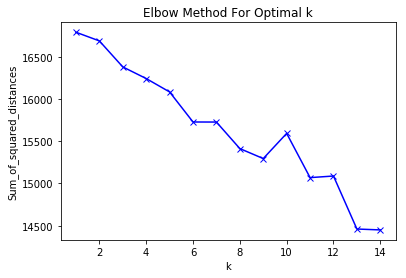

In [9]:
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1).fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()    